In [1]:
# Import the modules
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt

In [2]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
# if possible, read this from SQL
df = pd.read_csv(
    Path('csv/Patient_data.csv')
)

# Review the DataFrame
df.head()

,PatientID,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,...,AgeCategory,HeightInMeters,WeightInKilograms,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,0,0,1,3,4.0,0.0,0,1,9.0,0,...,0,1.60,71.67,0,0,1,1,0,0,0
1,1,0,0,3,0.0,0.0,0,1,6.0,0,...,1,1.78,95.25,0,0,1,1,1,0,0
2,2,0,0,3,0.0,0.0,0,0,8.0,1,...,2,1.85,108.86,1,0,0,1,2,0,1
3,3,0,1,1,5.0,0.0,0,1,9.0,0,...,3,1.70,90.72,0,0,1,1,2,0,1
4,4,0,1,2,3.0,15.0,0,1,5.0,2,...,3,1.55,79.38,0,0,1,1,2,0,0


In [3]:
heartdisease = []
# If patient had heart attack or angina, they will be classified as having heart disease
for index, row in df.iterrows():
    if (row['HadHeartAttack'] + row['HadAngina']) > 0:
        heartdisease.append(1)
    else:
        heartdisease.append(0)
# use these results as y variable for building model
y = pd.DataFrame(heartdisease,columns=['HadHeartDisease'])
y

,HadHeartDisease
0,0
1,0
2,0
3,0
4,0
...,...
246017,0
246018,0
246019,0
246020,0


In [4]:
# drop heart attack and angina column from original df. this will be used as the X variables
X = df.drop(columns=['HadHeartAttack','HadAngina','PatientID'])
X

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadStroke,...,AgeCategory,HeightInMeters,WeightInKilograms,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,0,1,3,4.0,0.0,0,1,9.0,0,0,...,0,1.60,71.67,0,0,1,1,0,0,0
1,0,0,3,0.0,0.0,0,1,6.0,0,0,...,1,1.78,95.25,0,0,1,1,1,0,0
2,0,0,3,0.0,0.0,0,0,8.0,1,0,...,2,1.85,108.86,1,0,0,1,2,0,1
3,0,1,1,5.0,0.0,0,1,9.0,0,0,...,3,1.70,90.72,0,0,1,1,2,0,1
4,0,1,2,3.0,15.0,0,1,5.0,2,0,...,3,1.55,79.38,0,0,1,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246017,53,0,3,0.0,0.0,2,1,6.0,0,0,...,6,1.78,102.06,1,0,0,0,1,0,0
246018,53,1,1,0.0,7.0,0,1,7.0,0,0,...,10,1.93,90.72,0,0,0,0,2,0,1
246019,53,0,2,0.0,15.0,0,1,7.0,2,1,...,0,1.68,83.91,1,1,1,1,1,0,1
246020,53,1,4,2.0,2.0,0,1,7.0,0,0,...,4,1.70,83.01,0,1,1,0,1,0,0


In [5]:
# Import the train_test_learn module
from sklearn.model_selection import train_test_split

# Split the data using train_test_split
# Assign a random_state of 1 to the function
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=7)

In [6]:
# Intiate the Logistic Regression model
from sklearn.linear_model import LogisticRegression
# Assign a random_state parameter of 1 to the model
reg_model = LogisticRegression(solver='lbfgs',class_weight='balanced',random_state=7)

# Fit the model using training data
model = reg_model.fit(X_train, y_train)
print(f"Training Data Score: {model.score(X_train, y_train)}")
print(f"Testing Data Score: {model.score(X_test, y_test)}")

c:\ProgramData\anaconda3\envs\dev\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training Data Score: 0.7512790218734419
Testing Data Score: 0.747585601404741


c:\ProgramData\anaconda3\envs\dev\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [7]:
# Make a prediction using the testing data
prediction = reg_model.predict(X_test)

In [8]:
# Generate a confusion matrix for the model
confusion_matrix = confusion_matrix(y_test, prediction)
cm_df = pd.DataFrame(
    confusion_matrix, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)
print("Confusion Matrix")
cm_df


Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,41894,14270
Actual 1,1255,4087


In [9]:
# Print the classification report for the model
class_report = classification_report(y_test, prediction)
print("Classification Report")
print(class_report)

Classification Report
              precision    recall  f1-score   support

           0       0.97      0.75      0.84     56164
           1       0.22      0.77      0.34      5342

    accuracy                           0.75     61506
   macro avg       0.60      0.76      0.59     61506
weighted avg       0.91      0.75      0.80     61506



<Axes: ylabel='Feature'>

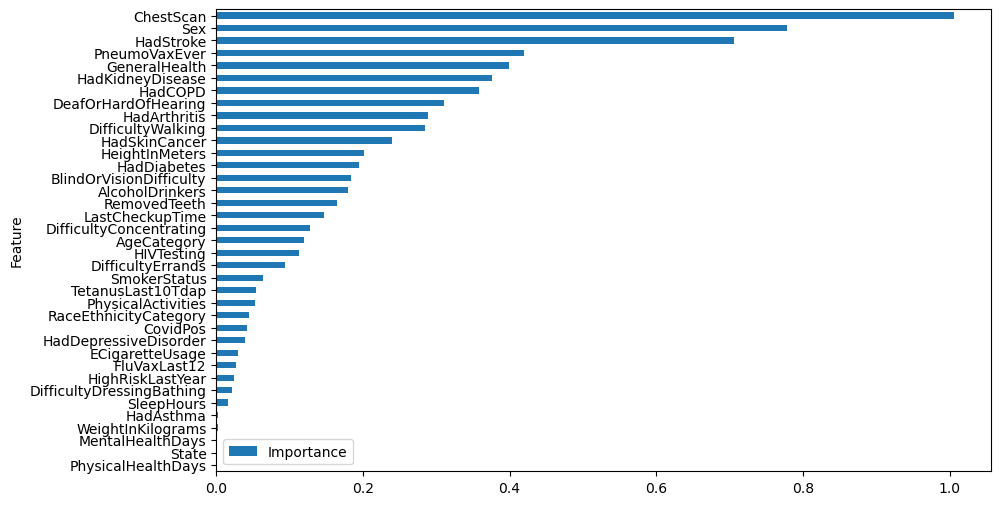

In [10]:
coefficients = model.coef_[0]
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': np.abs(coefficients)})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))
#https://forecastegy.com/posts/feature-importance-in-logistic-regression/